## Mengimport pustaka yang dibutuhkan

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
from sklearn.metrics import classification_report
%matplotlib inline

##  Data Loading

In [341]:
df = pd.read_excel("dataset/dataset_fix_rev.xlsx")

In [342]:
df

,nama_item,kategori_item,tanggal,hari,event,jenis_diskon,item_terjual
0,AIR MINERAL,DRINK,2022-08-25,kamis,tidak,tidak,7.0
1,CHAHAN NASI GORENG JEPANG,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,1.0
2,CHASIU,ADDITIONAL TOPPING,2022-08-25,kamis,tidak,tidak,4.0
3,CHICKEN KATSU DONBURI,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,2.0
4,CHICKEN KATSU RAMEN,RAMEN GURIH,2022-08-25,kamis,tidak,buy1get1,12.0
...,...,...,...,...,...,...,...
6593,SUKEMEN RAMEN,RAMEN PEDAS,2023-04-30,minggu,bulan ramadhan,tidak,1.0
6594,SUPPAI RAMEN,RAMEN PEDAS,2023-04-30,minggu,bulan ramadhan,tidak,12.0
6595,TAMAGO,ADDITIONAL TOPPING,2023-04-30,minggu,bulan ramadhan,tidak,2.0
6596,TEH HANGAT/PANAS,DRINK,2023-04-30,minggu,bulan ramadhan,tidak,6.0


In [343]:
df.shape

(6598, 7)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nama_item      6598 non-null   object        
 1   kategori_item  6598 non-null   object        
 2   tanggal        6598 non-null   datetime64[ns]
 3   hari           6598 non-null   object        
 4   event          6598 non-null   object        
 5   jenis_diskon   6598 non-null   object        
 6   item_terjual   6598 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 361.0+ KB


In [345]:
df.describe()

,item_terjual
count,6598.000000
mean,6.439351
std,7.182975
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,60.000000


In [346]:
df.isnull().sum()

nama_item        0
kategori_item    0
tanggal          0
hari             0
event            0
jenis_diskon     0
item_terjual     0
dtype: int64

In [347]:
df['tanggal'] = pd.to_datetime(df['tanggal'], format = '%Y-%m-%d', errors = 'coerce')

In [348]:
df['item_terjual'] = df['item_terjual'].astype(int)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nama_item      6598 non-null   object        
 1   kategori_item  6598 non-null   object        
 2   tanggal        6598 non-null   datetime64[ns]
 3   hari           6598 non-null   object        
 4   event          6598 non-null   object        
 5   jenis_diskon   6598 non-null   object        
 6   item_terjual   6598 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 335.2+ KB


In [350]:
df.isnull().sum()

nama_item        0
kategori_item    0
tanggal          0
hari             0
event            0
jenis_diskon     0
item_terjual     0
dtype: int64

In [351]:
df

,nama_item,kategori_item,tanggal,hari,event,jenis_diskon,item_terjual
0,AIR MINERAL,DRINK,2022-08-25,kamis,tidak,tidak,7
1,CHAHAN NASI GORENG JEPANG,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,1
2,CHASIU,ADDITIONAL TOPPING,2022-08-25,kamis,tidak,tidak,4
3,CHICKEN KATSU DONBURI,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,2
4,CHICKEN KATSU RAMEN,RAMEN GURIH,2022-08-25,kamis,tidak,buy1get1,12
...,...,...,...,...,...,...,...
6593,SUKEMEN RAMEN,RAMEN PEDAS,2023-04-30,minggu,bulan ramadhan,tidak,1
6594,SUPPAI RAMEN,RAMEN PEDAS,2023-04-30,minggu,bulan ramadhan,tidak,12
6595,TAMAGO,ADDITIONAL TOPPING,2023-04-30,minggu,bulan ramadhan,tidak,2
6596,TEH HANGAT/PANAS,DRINK,2023-04-30,minggu,bulan ramadhan,tidak,6


In [352]:
df['year'] = df['tanggal'].dt.year
df['month'] =  df['tanggal'].dt.month
df['week'] =  df['tanggal'].dt.week
df['day'] =  df['tanggal'].dt.day

C:\Users\Umam\AppData\Local\Temp\ipykernel_17760\3012441659.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] =  df['tanggal'].dt.week


In [360]:
df.head(30)

,nama_item,kategori_item,tanggal,hari,event,jenis_diskon,item_terjual,year,month,week,day
0,AIR MINERAL,DRINK,2022-08-25,kamis,tidak,tidak,7,2022,8,34,25
1,CHAHAN NASI GORENG JEPANG,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,1,2022,8,34,25
2,CHASIU,ADDITIONAL TOPPING,2022-08-25,kamis,tidak,tidak,4,2022,8,34,25
3,CHICKEN KATSU DONBURI,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,2,2022,8,34,25
4,CHICKEN KATSU RAMEN,RAMEN GURIH,2022-08-25,kamis,tidak,buy1get1,12,2022,8,34,25
5,CHICKEN TERIYAKI DONBURI,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,3,2022,8,34,25
6,CHIKUWA,ADDITIONAL TOPPING,2022-08-25,kamis,tidak,tidak,2,2022,8,34,25
7,COCA COLA,DRINK,2022-08-25,kamis,tidak,tidak,1,2022,8,34,25
8,CURRY RAMEN,RAMEN GURIH,2022-08-25,kamis,tidak,buy1get1,6,2022,8,34,25
9,CURRY RICE,NASI/DONBURI,2022-08-25,kamis,tidak,tidak,1,2022,8,34,25


<AxesSubplot: xlabel='kategori_item', ylabel='item_terjual'>

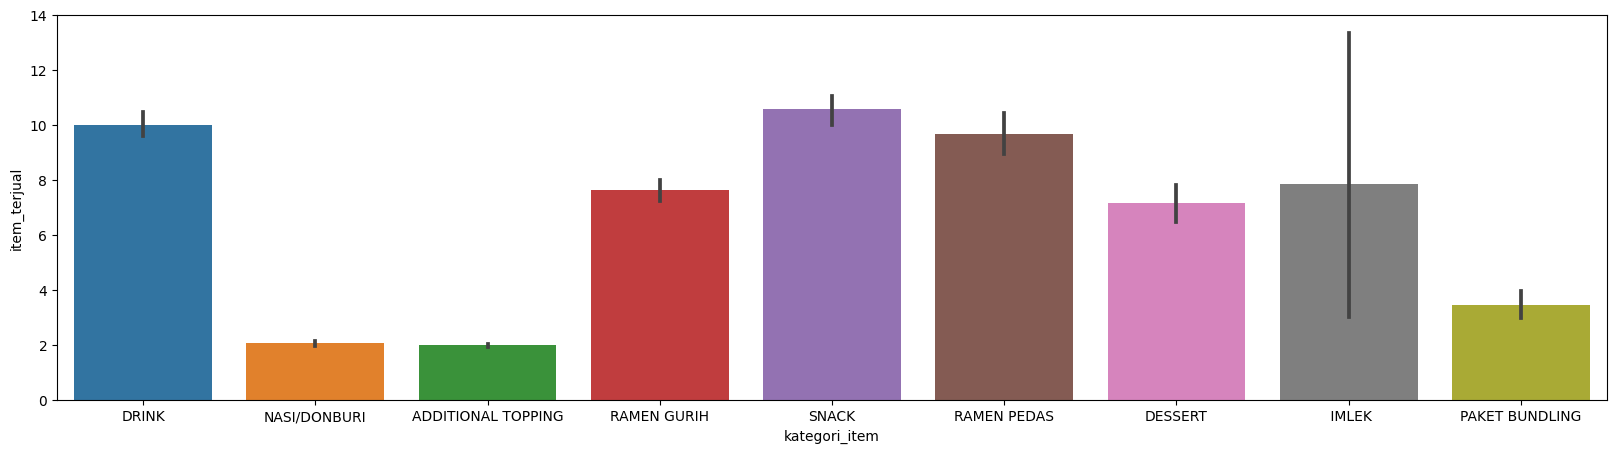

In [300]:
# Visualize jumlah item terjual per kategori_item
plt.figure(figsize=(20,5))
sns.barplot( data=df, x="kategori_item", y="item_terjual" )

<AxesSubplot: ylabel='nama_item'>

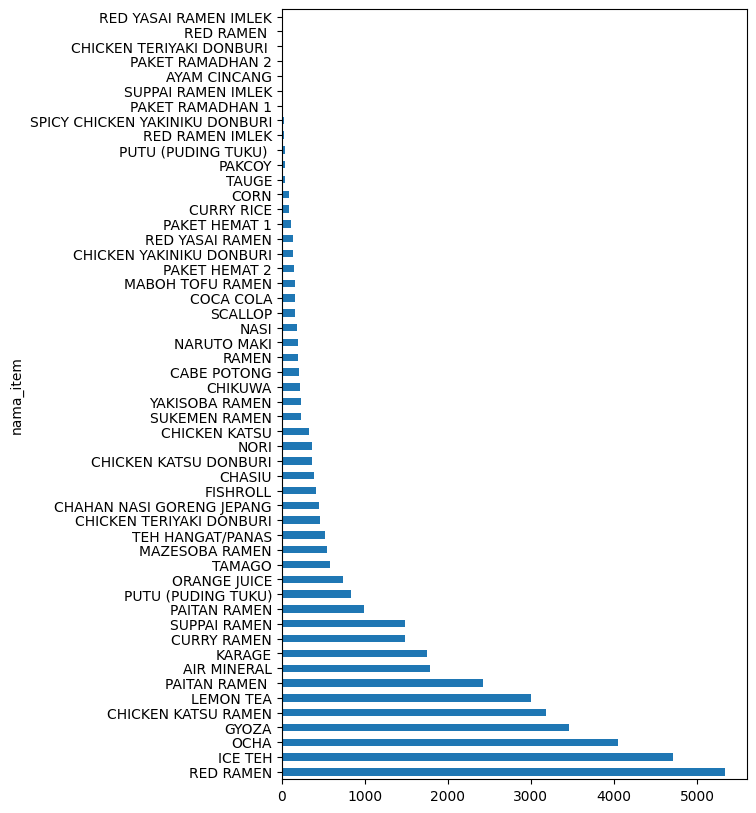

In [301]:
df.groupby('nama_item')['item_terjual'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(6,10))

<AxesSubplot: xlabel='hari', ylabel='item_terjual'>

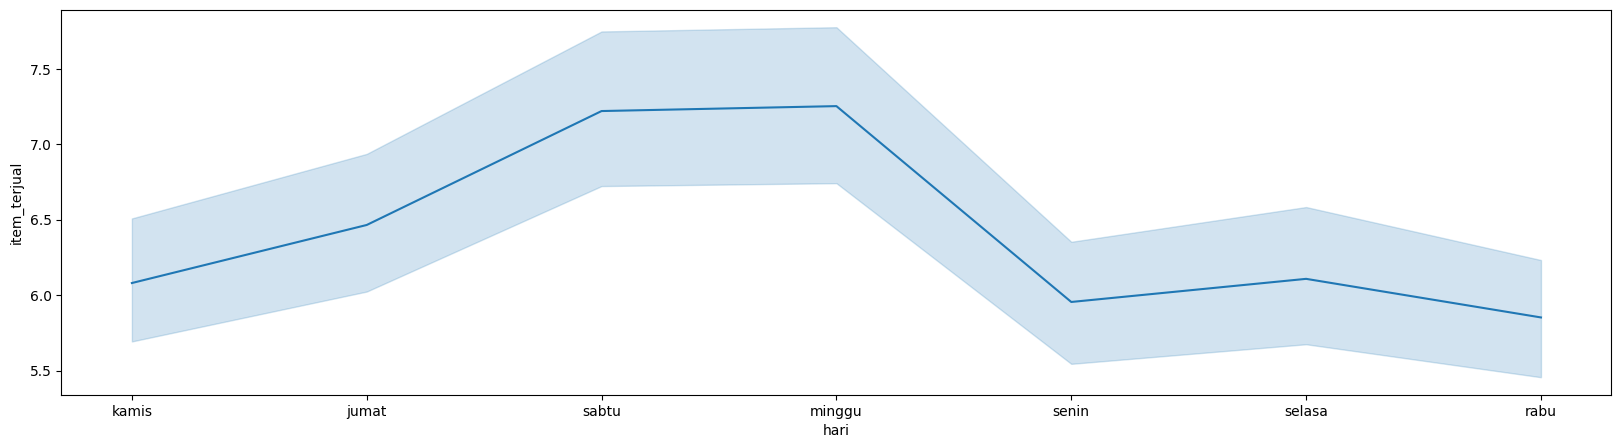

In [302]:
# Visualize jumlah item terjual per kategori_item
plt.figure(figsize=(20,5))
sns.lineplot(x="hari", y="item_terjual", data=df)

<AxesSubplot: ylabel='jenis_diskon'>

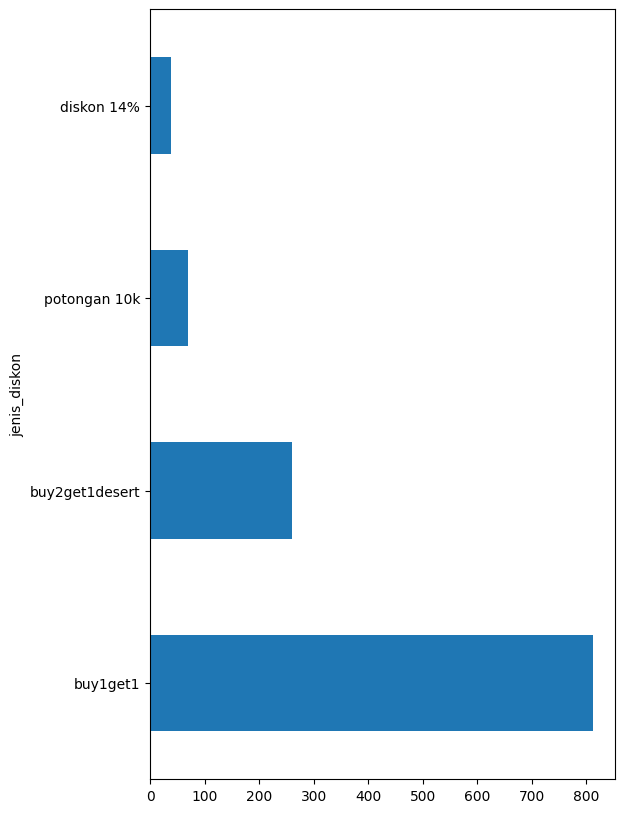

In [303]:
selected_events = ['buy1get1','buy2get1desert','potongan 10k','diskon 14%']
df[df['jenis_diskon'].isin(selected_events)].groupby('jenis_diskon')['item_terjual'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(6,10))

<AxesSubplot: ylabel='event'>

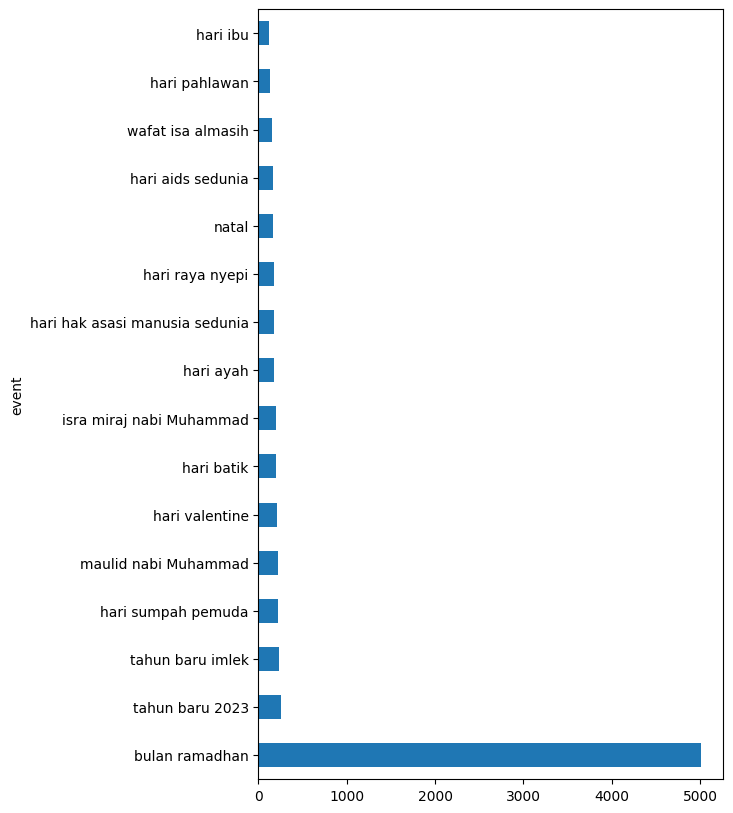

In [304]:
selected_events = ['hari ibu', 'hari pahlawan', 'wafat isa almasih', 'hari aids sedunia', 'natal','hari raya nyepi','hari ayah','hari hak asasi manusia sedunia','hari guru ','isra miraj nabi Muhammad','hari batik','hari valentine','maulid nabi Muhammad','hari sumpah pemuda','tahun baru imlek','tahun baru 2023','bulan ramadhan']
df[df['event'].isin(selected_events)].groupby('event')['item_terjual'].sum().sort_values(ascending=False).plot(kind='barh', figsize=(6,10))

<AxesSubplot: xlabel='month', ylabel='item_terjual'>

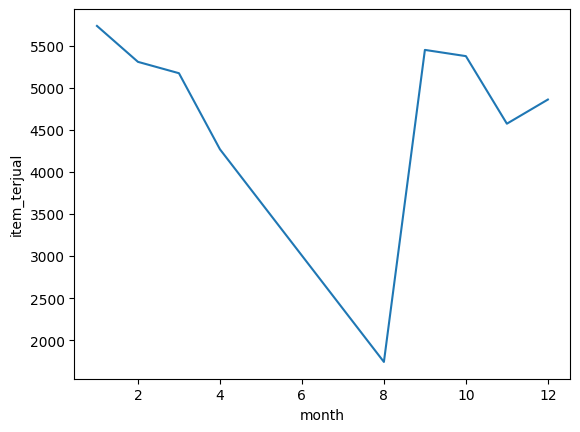

In [305]:
# Visualize total penjualan per bulan
df_monthly = df.groupby(["year", "month"])["item_terjual"].sum().reset_index()
sns.lineplot(x="month", y="item_terjual", data=df_monthly)

In [306]:
df['nama_item'] = label_encoder.fit_transform(df['nama_item'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
AIR MINERAL --> 0
AYAM CINCANG --> 1
CABE POTONG --> 2
CHAHAN NASI GORENG JEPANG --> 3
CHASIU --> 4
CHICKEN KATSU --> 5
CHICKEN KATSU DONBURI --> 6
CHICKEN KATSU RAMEN --> 7
CHICKEN TERIYAKI DONBURI --> 8
CHICKEN TERIYAKI DONBURI  --> 9
CHICKEN YAKINIKU DONBURI --> 10
CHIKUWA --> 11
COCA COLA --> 12
CORN --> 13
CURRY RAMEN --> 14
CURRY RICE --> 15
FISHROLL --> 16
GYOZA --> 17
ICE TEH --> 18
KARAGE --> 19
LEMON TEA --> 20
MABOH TOFU RAMEN --> 21
MAZESOBA RAMEN --> 22
NARUTO MAKI --> 23
NASI --> 24
NORI --> 25
OCHA --> 26
ORANGE JUICE --> 27
PAITAN RAMEN --> 28
PAITAN RAMEN  --> 29
PAKCOY --> 30
PAKET HEMAT 1 --> 31
PAKET HEMAT 2 --> 32
PAKET RAMADHAN 1 --> 33
PAKET RAMADHAN 2 --> 34
PUTU (PUDING TUKU) --> 35
PUTU (PUDING TUKU)  --> 36
RAMEN --> 37
RED RAMEN --> 38
RED RAMEN  --> 39
RED RAMEN IMLEK --> 40
RED YASAI RAMEN --> 41
RED YASAI RAMEN IMLEK --> 42
SCALLOP --> 43
SPICY CHICKEN YAKINIKU DONBURI --> 44
SUKEMEN RAMEN --> 45
SUPPAI RAMEN --> 46
SUPPAI RAMEN IM

In [307]:
df['kategori_item'] = label_encoder.fit_transform(df['kategori_item'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
 IMLEK --> 0
ADDITIONAL TOPPING --> 1
DESSERT --> 2
DRINK --> 3
NASI/DONBURI --> 4
PAKET BUNDLING --> 5
RAMEN GURIH --> 6
RAMEN PEDAS --> 7
SNACK --> 8


In [308]:
df['hari'] = label_encoder.fit_transform(df['hari'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
jumat --> 0
kamis --> 1
minggu --> 2
rabu --> 3
sabtu --> 4
selasa --> 5
senin --> 6


In [309]:
df['event'] = label_encoder.fit_transform(df['event'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
bulan ramadhan --> 0
hari aids sedunia --> 1
hari ayah --> 2
hari batik --> 3
hari guru --> 4
hari hak asasi manusia sedunia --> 5
hari ibu --> 6
hari pahlawan --> 7
hari raya nyepi --> 8
hari sumpah pemuda --> 9
hari valentine --> 10
isra miraj nabi Muhammad --> 11
maulid nabi Muhammad --> 12
natal --> 13
tahun baru 2023 --> 14
tahun baru imlek --> 15
tidak --> 16
wafat isa almasih --> 17


In [310]:
df['jenis_diskon'] = label_encoder.fit_transform(df['jenis_diskon'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
buy1get1 --> 0
buy2get1desert --> 1
diskon 14% --> 2
potongan 10k --> 3
tidak --> 4


C:\Users\Umam\AppData\Local\Temp\ipykernel_17760\1111587257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

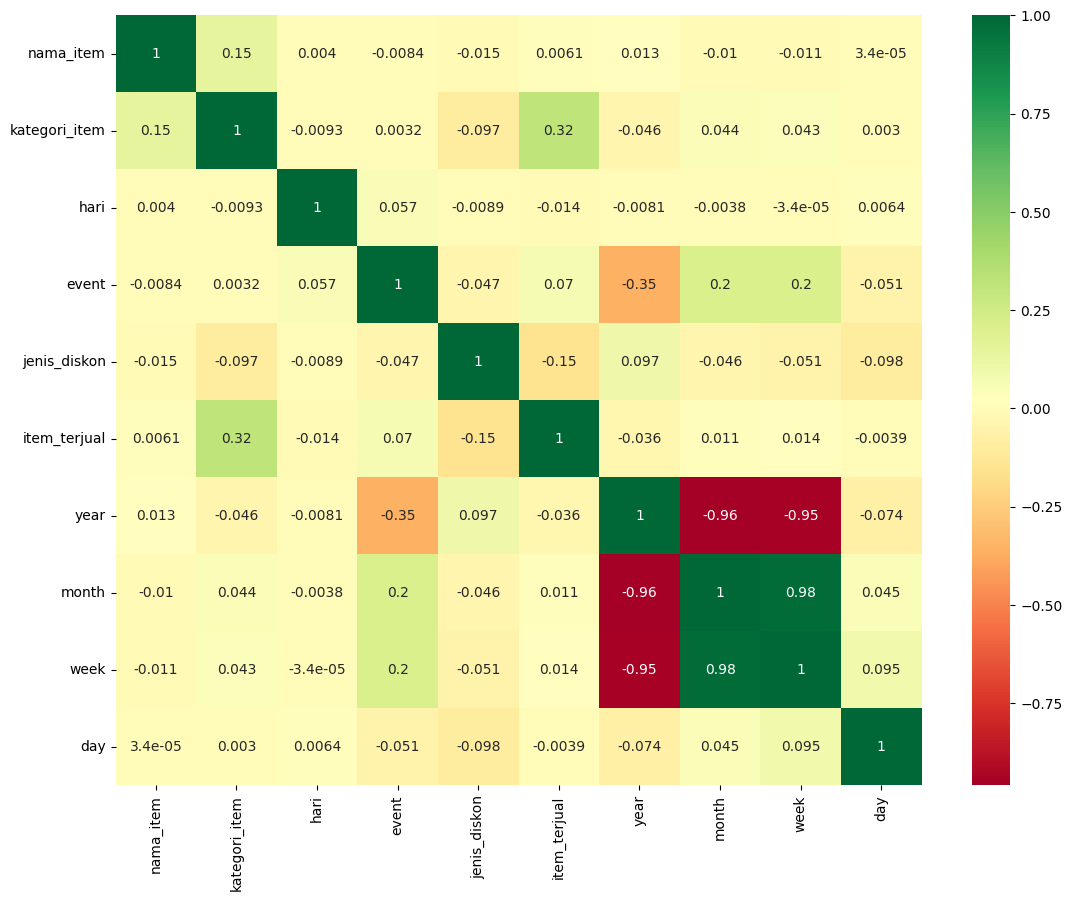

In [311]:
corr = df.corr()
top_corr = corr.index
plt.figure(figsize=(13,10))
sns.heatmap(df[top_corr].corr(),annot=True,cmap="RdYlGn")

In [312]:
df_model = df[['kategori_item','week','month','year','jenis_diskon','item_terjual']]

In [313]:
df_model

,kategori_item,week,month,year,jenis_diskon,item_terjual
0,3,34,8,2022,4,7
1,4,34,8,2022,4,1
2,1,34,8,2022,4,4
3,4,34,8,2022,4,2
4,6,34,8,2022,0,12
...,...,...,...,...,...,...
6593,7,17,4,2023,4,1
6594,7,17,4,2023,4,12
6595,1,17,4,2023,4,2
6596,3,17,4,2023,4,6


In [314]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   kategori_item  6598 non-null   int32
 1   week           6598 non-null   int64
 2   month          6598 non-null   int64
 3   year           6598 non-null   int64
 4   jenis_diskon   6598 non-null   int32
 5   item_terjual   6598 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 232.1 KB


In [315]:
df_model.describe()

,kategori_item,week,month,year,jenis_diskon,item_terjual
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3.957563,26.086541,6.405123,2022.501970,3.963928,6.439224
std,2.368894,17.920824,4.115803,0.500034,0.360514,7.182976
min,0.000000,1.000000,1.000000,2022.000000,0.000000,1.000000
25%,1.000000,9.000000,2.000000,2022.000000,4.000000,1.000000
50%,3.000000,34.000000,4.000000,2023.000000,4.000000,3.000000
75%,6.000000,43.000000,10.000000,2023.000000,4.000000,9.000000
max,8.000000,52.000000,12.000000,2023.000000,4.000000,60.000000


In [316]:
x = df_model.drop('item_terjual', axis=1)
y = df_model[['item_terjual']].values.reshape(-1,1)


In [317]:
data= X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (5278, 5)
Shape Testing Feature: (1320, 5)
Shape Training Feature: (5278, 1)
Shape Testing Feature: (1320, 1)


In [318]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [319]:
print("Lyft :")
print('Cofficients (b) : ', regr.coef_)
print('Intercept (a) : ', regr.intercept_)

Lyft :
Cofficients (b) :  [[ 0.90558937  0.01881312 -0.43731329 -3.04725148 -2.58725898]]
Intercept (a) :  [6178.48861179]


In [320]:
regr.score(X_test, y_test)

0.1232760081668729

In [321]:
ypred = regr.predict(X_test)

In [322]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("r2 Score : ", r2_score(y_test, ypred))
print("MAE Score : ", mean_absolute_error(y_test, ypred))
print("RMSE Score : ", np.sqrt(mean_squared_error(y_test, ypred)))

r2 Score :  0.1232760081668729
MAE Score :  4.8713184808300305
RMSE Score :  6.7666453743742725


In [323]:
xtest = [[2,2,2.5,1]]
df_test = pd.DataFrame(xtest, columns=[['name', 'weather','distance','surge_multiplier']])
pred = regr.predict(df_test)

c:\Users\Umam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 5 features as input.

In [ ]:
print("Prediksi harga Lyft : ", pred)

Prediksi harga Lyft :  [[19.20063967]]
Prediksi harga Uber :  [[18.98054531]]


In [ ]:
import pickle

In [ ]:
pickle.dump(regr_0, open('lyft_model.pkl','wb'))

In [ ]:
pickle.dump(regr_1, open('uber_model.pkl','wb'))